# Prediction the likelihood of e-signing a loan based on financial history

# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Importing the Dataset

In [2]:
dataset = pd.read_csv('financial_data.csv')

In [3]:
dataset.head()

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,1,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,1,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,1,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,1,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,1,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0


In [4]:
dataset.shape

(17908, 21)

In [5]:
dataset.describe()

,entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
count,1.790800e+04,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000
mean,5.596978e+06,43.015412,0.425173,3657.214653,1.186006,3.526860,3.584711,3.427183,3.503350,0.795399,950.446449,61086.302211,0.690878,0.878276,0.583155,0.718252,0.623112,0.622068,6.457226,0.538251
std,2.562473e+06,11.873107,0.494383,1504.890063,2.400897,2.259732,2.751937,2.216440,1.955568,0.403421,698.543683,15394.255020,0.090470,0.054563,0.125061,0.120697,0.139729,0.139898,3.673093,0.498549
min,1.111398e+06,18.000000,0.000000,905.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,350.000000,2100.000000,0.023258,0.451371,0.016724,0.153367,0.010184,0.006622,1.000000,0.000000
25%,3.378999e+06,34.000000,0.000000,2580.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,600.000000,49350.000000,0.640993,0.850882,0.500208,0.633708,0.521735,0.519677,4.000000,0.000000
50%,5.608376e+06,42.000000,0.000000,3260.000000,0.000000,3.000000,3.000000,2.000000,3.000000,1.000000,700.000000,61200.000000,0.699561,0.881004,0.588208,0.725113,0.625944,0.622974,6.000000,1.000000
75%,7.805624e+06,51.000000,1.000000,4670.000000,1.000000,5.000000,5.000000,5.000000,4.000000,1.000000,1100.000000,72750.000000,0.752887,0.912608,0.672395,0.806681,0.729841,0.728940,8.000000,1.000000
max,9.999874e+06,96.000000,1.000000,9985.000000,11.000000,16.000000,12.000000,11.000000,15.000000,1.000000,10200.000000,99750.000000,0.999997,0.999024,0.978932,0.996260,0.970249,0.966953,30.000000,1.000000


# Histogram

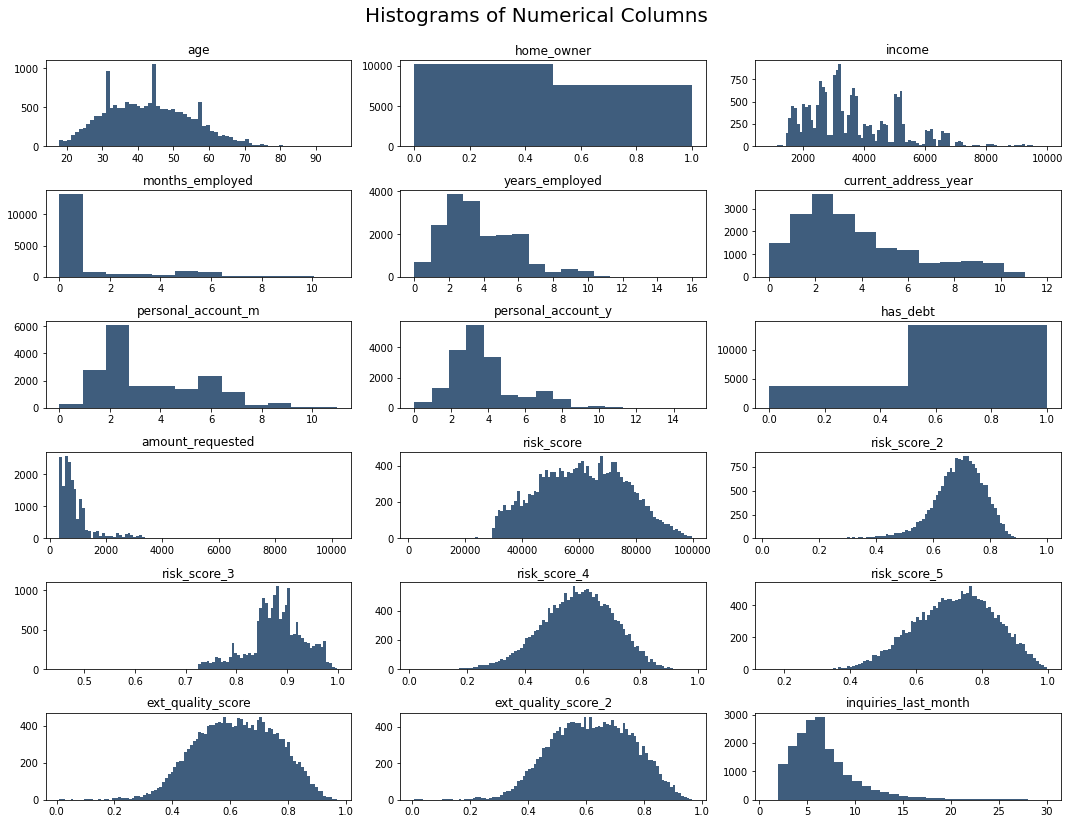

In [6]:
dataset2 = dataset.drop(columns = ['entry_id', 'pay_schedule', 'e_signed'])

fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(dataset2.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(dataset2.columns.values[i])

    vals = np.size(dataset2.iloc[:, i].unique())
    if vals >= 100:
        vals = 100
    
    plt.hist(dataset2.iloc[:, i], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Correlation

## Correlation with response variable

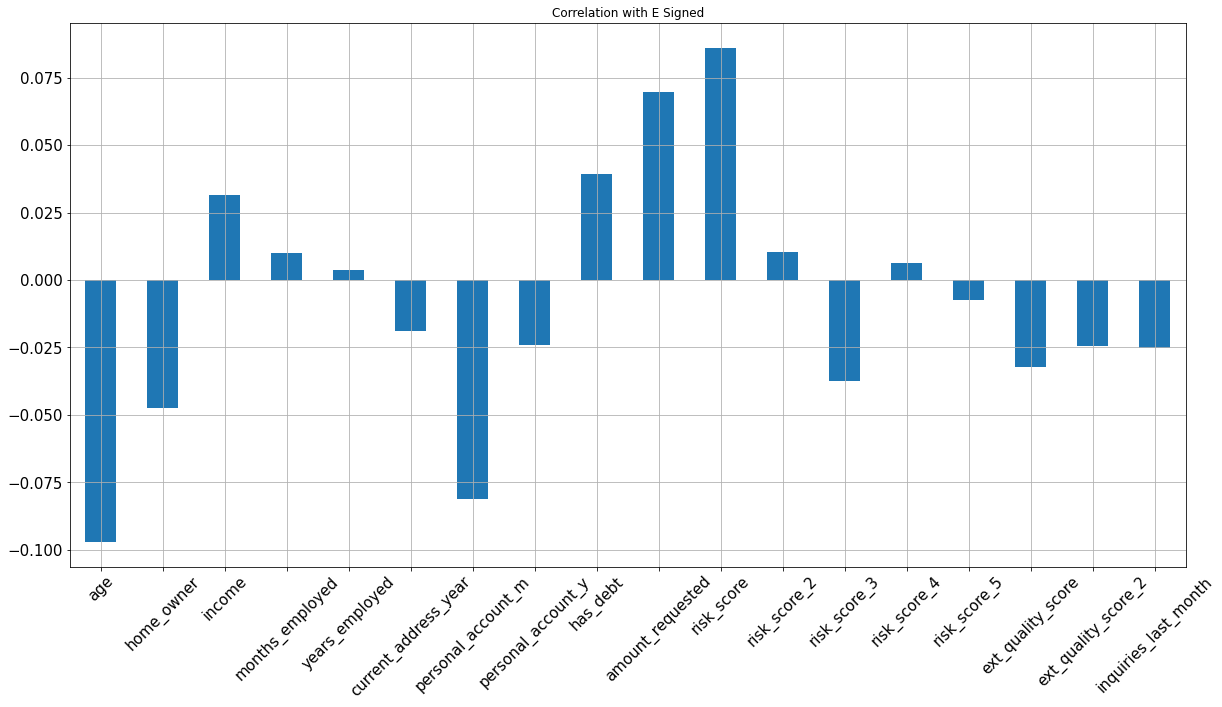

In [7]:
## Correlation with Response Variable (Note: Models like RF are not linear like these)

dataset2.corrwith(dataset.e_signed).plot.bar(
        figsize = (20, 10), title = "Correlation with E Signed", fontsize = 15,
        rot = 45, grid = True)

## Matrix Correlation

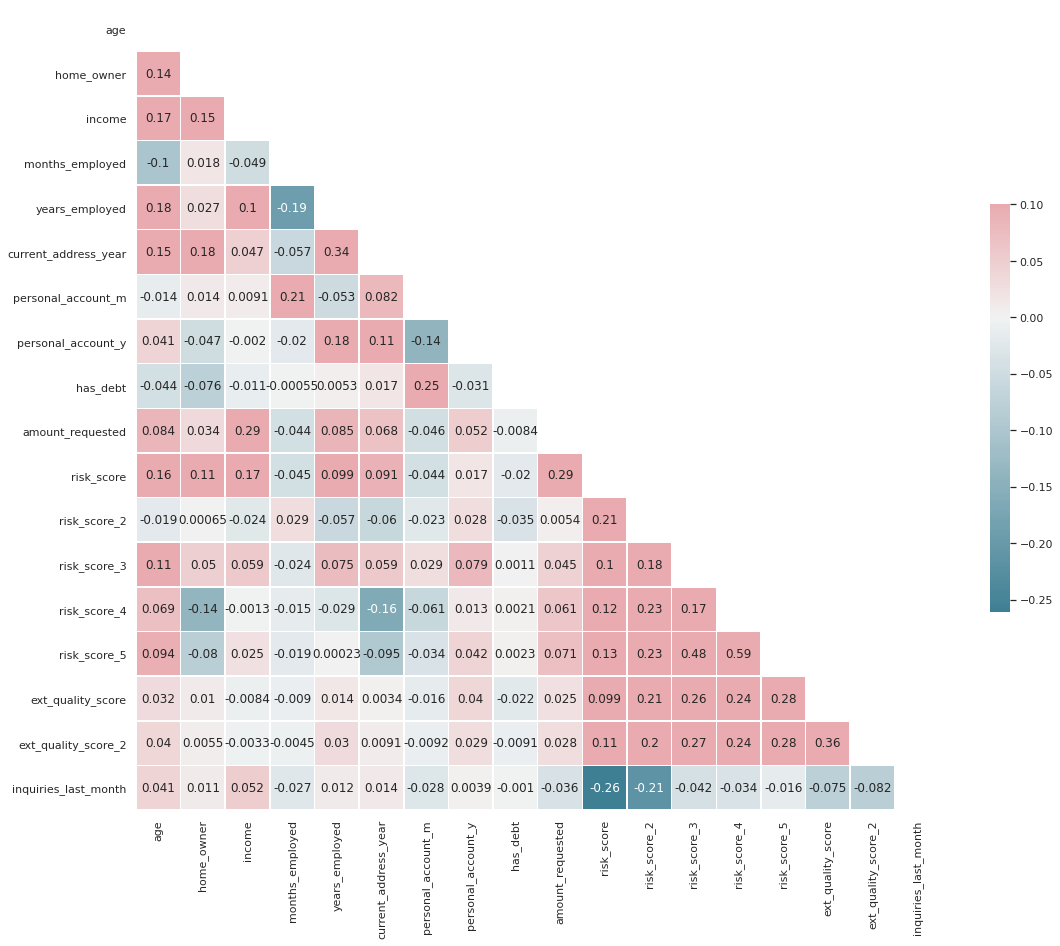

In [8]:
## Correlation Matrix
sns.set(style="white")

# Compute the correlation matrix
corr = dataset2.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

# Feature Engineering

In [9]:
dataset['months_employed']

0        0
1        0
2        6
3        0
4        0
        ..
17903    0
17904    0
17905    0
17906    0
17907    0
Name: months_employed, Length: 17908, dtype: int64

In [10]:
dataset = dataset.drop(columns='months_employed') # There is so much zeros

In [11]:
# Here we transform the variable personal_m and personal_y into a column personal_mont
dataset['Personal_account_months'] = (dataset.personal_account_m + (dataset.personal_account_y * 12))
dataset[['personal_account_m', 'personal_account_y', 'Personal_account_months']].head()

,personal_account_m,personal_account_y,Personal_account_months
0,6,2,30
1,2,7,86
2,7,1,19
3,2,7,86
4,2,8,98


In [12]:
dataset = dataset.drop(columns=['personal_account_m', 'personal_account_y'])

# OneHot Encoding

In [13]:
dataset.dtypes

entry_id                     int64
age                          int64
pay_schedule                object
home_owner                   int64
income                       int64
years_employed               int64
current_address_year         int64
has_debt                     int64
amount_requested             int64
risk_score                   int64
risk_score_2               float64
risk_score_3               float64
risk_score_4               float64
risk_score_5               float64
ext_quality_score          float64
ext_quality_score_2        float64
inquiries_last_month         int64
e_signed                     int64
Personal_account_months      int64
dtype: object

In [14]:
dataset = pd.get_dummies(dataset)

In [15]:
dataset.columns

Index(['entry_id', 'age', 'home_owner', 'income', 'years_employed',
       'current_address_year', 'has_debt', 'amount_requested', 'risk_score',
       'risk_score_2', 'risk_score_3', 'risk_score_4', 'risk_score_5',
       'ext_quality_score', 'ext_quality_score_2', 'inquiries_last_month',
       'e_signed', 'Personal_account_months', 'pay_schedule_bi-weekly',
       'pay_schedule_monthly', 'pay_schedule_semi-monthly',
       'pay_schedule_weekly'],
      dtype='object')

In [16]:
dataset['pay_schedule_semi-monthly']

0        0
1        0
2        0
3        0
4        1
        ..
17903    0
17904    0
17905    0
17906    0
17907    0
Name: pay_schedule_semi-monthly, Length: 17908, dtype: uint8

In [17]:
dataset = dataset.drop(columns='pay_schedule_semi-monthly')

In [18]:
# Removing Extras columns

response = dataset['e_signed']
users = dataset['entry_id']
dataset = dataset.drop(columns=['e_signed', 'entry_id'])


# Split into training and test set

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset, response, test_size = 0.2, random_state = 0)

# Feature Scaling

In [20]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train_bckp = pd.DataFrame(sc_X.fit_transform(X_train))
X_test_bckp = pd.DataFrame(sc_X.transform(X_test))
X_train_bckp.columns = X_train.columns.values
X_test_bckp.columns = X_test.columns.values
X_train_bckp.index = X_train.index.values
X_test_bckp.index = X_test.index.values
X_train = X_train_bckp
X_test = X_test_bckp

# Building and training the models

In [21]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression(random_state = 0)
classifier1.fit(X_train, y_train)

# K Nearest Nieghbors

from sklearn.neighbors import KNeighborsClassifier
classifier2 = KNeighborsClassifier(n_neighbors= 5, metric='minkowski', p = 2)
classifier2.fit(X_train, y_train)

# Support Vector Machine - Linear Classifier

from sklearn.svm import SVC
classifier3 = SVC(kernel= 'linear', random_state=0)
classifier3.fit(X_train, y_train)

# Kernel Support Vector Machine

from sklearn.svm import SVC
classifier4 = SVC(kernel='rbf', random_state=0)
classifier4.fit(X_train, y_train)

# Naïves Bayes Classification

from sklearn.naive_bayes import GaussianNB
classifier5 = GaussianNB()
classifier5.fit(X_train, y_train)

# Decision Tree Classification

from sklearn.tree import DecisionTreeClassifier
classifier6 = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier6.fit(X_train, y_train)

# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
classifier7 = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state = 0)
classifier7.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

# Predicting New results

In [22]:
y_pred1 = classifier1.predict(X_test)
y_pred2 = classifier2.predict(X_test)
y_pred3 = classifier3.predict(X_test)
y_pred4 = classifier4.predict(X_test)
y_pred5 = classifier5.predict(X_test)
y_pred6 = classifier5.predict(X_test)
y_pred7 = classifier7.predict(X_test)

# Models selection

## Confusion Matrix

In [23]:
from sklearn.metrics import classification_report, confusion_matrix
cm1 = confusion_matrix(y_test, y_pred1)
cm2 = confusion_matrix(y_test, y_pred2)
cm3 = confusion_matrix(y_test, y_pred3)
cm4 = confusion_matrix(y_test, y_pred4)
cm5 = confusion_matrix(y_test, y_pred5)
cm6 = confusion_matrix(y_test, y_pred6)
cm7 = confusion_matrix(y_test, y_pred7)
print('Checking Confusion Matrix to a single observation')
print('Logistic Regression Classification')
print(cm1)
print(classification_report(y_test,y_pred1))
print('\n')
print('K Nearest Neighbors')
print(cm2)
print(classification_report(y_test,y_pred2))
print('\n')
print('Support Vector Machine')
print(cm3)
print(classification_report(y_test,y_pred3))
print('\n')
print('Kernel Support Vector Machine')
print(cm4)
print(classification_report(y_test,y_pred4))
print('\n')
print('Naive Bayes Classification')
print(cm5)
print(classification_report(y_test,y_pred5))
print('\n')
print('Decision Tree Classification')
print(cm6)
print(classification_report(y_test,y_pred6))
print('\n')
print('Random Forest Classification')
print(cm7)
print(classification_report(y_test,y_pred7))
print('\n')


Checking Confusion Matrix to a single observation
Logistic Regression Classification
[[ 653 1001]
 [ 566 1362]]
              precision    recall  f1-score   support

           0       0.54      0.39      0.45      1654
           1       0.58      0.71      0.63      1928

    accuracy                           0.56      3582
   macro avg       0.56      0.55      0.54      3582
weighted avg       0.56      0.56      0.55      3582



K Nearest Neighbors
[[ 810  844]
 [ 749 1179]]
              precision    recall  f1-score   support

           0       0.52      0.49      0.50      1654
           1       0.58      0.61      0.60      1928

    accuracy                           0.56      3582
   macro avg       0.55      0.55      0.55      3582
weighted avg       0.55      0.56      0.55      3582



Support Vector Machine
[[ 617 1037]
 [ 509 1419]]
              precision    recall  f1-score   support

           0       0.55      0.37      0.44      1654
           1       0.58 

## K-fold validation

In [24]:
from sklearn.model_selection import cross_val_score
accuracies1 = cross_val_score(estimator = classifier1, X = X_train, y = y_train, cv = 10)
accuracies2 = cross_val_score(estimator = classifier2, X = X_train, y = y_train, cv = 10)
accuracies3 = cross_val_score(estimator = classifier3, X = X_train, y = y_train, cv = 10)
accuracies4 = cross_val_score(estimator = classifier4, X = X_train, y = y_train, cv = 10)
accuracies5 = cross_val_score(estimator = classifier5, X = X_train, y = y_train, cv = 10)
accuracies6 = cross_val_score(estimator = classifier6, X = X_train, y = y_train, cv = 10)
accuracies7 = cross_val_score(estimator = classifier7, X = X_train, y = y_train, cv = 10)

print('Checking K-Fold Cross Validation')
print('\n')
print('Logistic Regression Classification')
print("Accuracy: {:.2f} %".format(accuracies1.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies1.std()*100))
print('\n')
print('K Nearest Neighbors')
print("Accuracy: {:.2f} %".format(accuracies2.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies2.std()*100))
print('\n')
print('Support Vector Machine')
print("Accuracy: {:.2f} %".format(accuracies3.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies3.std()*100))
print('\n')
print('Kernel Support Vector Machine')
print("Accuracy: {:.2f} %".format(accuracies4.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies4.std()*100))
print('\n')
print('Naive Bayes Classification')
print("Accuracy: {:.2f} %".format(accuracies5.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies5.std()*100))
print('\n')
print('Decision Tree Classification')
print("Accuracy: {:.2f} %".format(accuracies6.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies6.std()*100))
print('\n')
print('Random Forest Classification')
print("Accuracy1: {:.2f} %".format(accuracies7.mean()*100))
print("Standard1 Deviation: {:.2f} %".format(accuracies7.std()*100))

Checking K-Fold Cross Validation


Logistic Regression Classification
Accuracy: 57.71 %
Standard Deviation: 0.90 %


K Nearest Neighbors
Accuracy: 55.84 %
Standard Deviation: 1.19 %


Support Vector Machine
Accuracy: 57.96 %
Standard Deviation: 0.83 %


Kernel Support Vector Machine
Accuracy: 61.13 %
Standard Deviation: 1.33 %


Naive Bayes Classification
Accuracy: 57.41 %
Standard Deviation: 0.86 %


Decision Tree Classification
Accuracy: 55.91 %
Standard Deviation: 1.23 %


Random Forest Classification
Accuracy1: 63.02 %
Standard1 Deviation: 1.25 %


## Boosting the model

In [ ]:
param_grid1 = {'criterion': ['gini', 'entropy'], 'n_estimators': [10, 50, 100, 500, 1000]}

from sklearn.model_selection import GridSearchCV

grid1 = GridSearchCV(classifier7, param_grid1, cv = 10, verbose = 4, n_jobs = -1)

class_boost_1 = grid1.fit(X_train,y_train)

"""## Predicting boosted results"""

boost_predictions1 = class_boost_1.predict(X_test)

"""## Analizing the new boosted results (Confusion Matrix and Rapport Score)"""

cmb1 = confusion_matrix(y_test, boost_predictions1)

sns.heatmap(cmb1, annot=True)
print(classification_report(y_test,boost_predictions1))
print('The best parameters for Random Forest:')
print(grid1.best_params_)
print('\n')
print('Confusion Matrix')

print('Average Accuracy {:.2f}%'.format(grid1.best_score_ * 100))
print('Standard Deviation {:.2f}%'.format(grid1.cv_results_['std_test_score'][grid1.best_index_] * 100))

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   24.4s
